In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
SEED=42

In [46]:
df = pd.read_csv("../../datasets/ds_original_synthetic.csv")
df.head()

,Heart Beat 0.8~2.5hz from Avg,Peak Hz in 2.6~10hz,Peak Hz in 21~30hz,Peak Hz in 31~40hz,Peak Hz in 41~50hz,RMS avg,Zero crossing rate avg,Spectral flatness avg,Spectral rolloff avg,Spectral centroid avg,Poly features avg,Spectral bandwidth avg,Not Normal
0,69.0,5.50,23.33,31.00,43.67,0.2528,0.0280,0.0202,3931.6415,3655.5029,0.8441,5149.4551,1
1,78.0,3.12,30.00,40.00,43.25,0.1949,0.0372,0.0211,5369.9529,4887.3982,0.6950,6042.2007,0
2,78.0,3.00,24.71,39.50,41.50,0.2060,0.0275,0.0148,5252.5443,4598.1605,0.6630,6013.8062,1
3,76.0,4.00,25.00,40.00,50.00,0.2054,0.0720,0.0470,7429.2183,7041.1570,1.1817,6818.1680,0
4,83.0,5.78,22.40,38.78,45.00,0.2440,0.0008,0.0000,71.4086,128.8602,0.4138,605.7551,1


In [47]:
X, y = df.drop(['Not Normal'],axis=1), df['Not Normal']

In [48]:
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=42, n_jobs=-1)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Zero crossing rate avg (0.403545)
2. feature Heart Beat 0.8~2.5hz from Avg (0.197096)
3. feature Peak Hz in 31~40hz (0.100103)
4. feature Spectral rolloff avg (0.092726)
5. feature Spectral centroid avg (0.091023)
6. feature Spectral bandwidth avg (0.073165)
7. feature Peak Hz in 21~30hz (0.015644)
8. feature Peak Hz in 41~50hz (0.010959)
9. feature Peak Hz in 2.6~10hz (0.009927)
10. feature Poly features avg (0.002286)
11. feature RMS avg (0.001936)
12. feature Spectral flatness avg (0.001590)


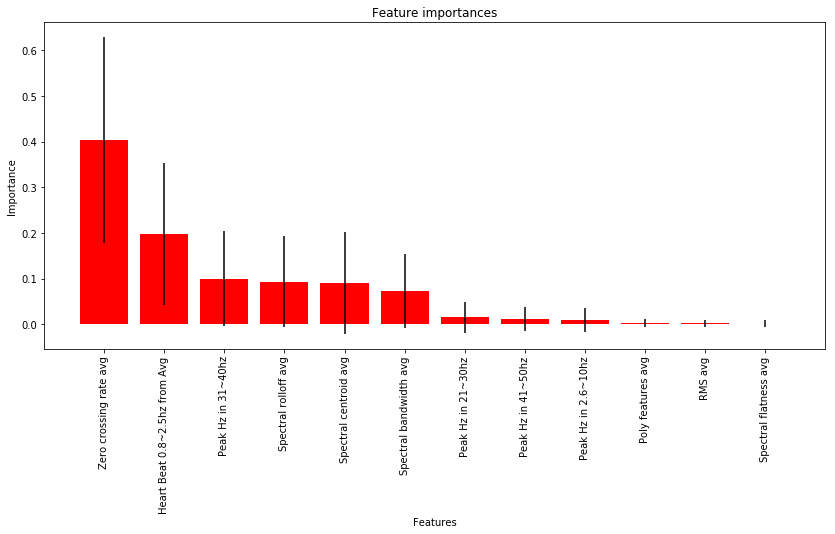

In [49]:
# Plot the feature importances of the forest
columns_sorted_by_importance = [X.columns[f] for f in indices]
plt.figure(figsize=(14,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), columns_sorted_by_importance, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xlim([-1, X.shape[1]])
plt.show()

In [50]:
feature_count = [6, 8, 9, 10]
accuracy_scores = []
precision_scores = []
recall_scores = []

columns_sorted_by_importance = [X.columns[f] for f in indices]
for c in feature_count:
    X_train_important =   X_train[columns_sorted_by_importance[:c]]
    X_test_important =   X_test[columns_sorted_by_importance[:c]]
    forest_important = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42, n_jobs=-1)
    forest_important.fit(X_train_important, y_train)
    y_pred = forest_important.predict(X_test_important)
    accuracy_sc = round(accuracy_score(y_test, y_pred), 2)
    precision_sc = round(precision_score(y_test, y_pred), 2)
    recall_sc = round(recall_score(y_test, y_pred), 2)
    accuracy_scores.append(accuracy_sc)
    precision_scores.append(precision_sc)
    recall_scores.append(recall_sc)

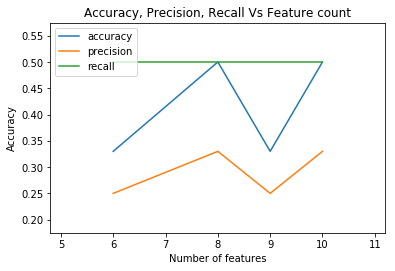

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(feature_count, accuracy_scores)
plt.plot(feature_count, precision_scores)
plt.plot(feature_count, recall_scores)
plt.margins(0.3)
plt.subplots_adjust(bottom=0.15)

plt.title('Accuracy, Precision, Recall Vs Feature count')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.legend(['accuracy', 'precision', 'recall'], loc='upper left')
plt.show()

In [58]:
df_importance = df[['Zero crossing rate avg', 'Heart Beat 0.8~2.5hz from Avg', 'Peak Hz in 31~40hz', 'Spectral rolloff avg', 'Spectral centroid avg', 'Spectral bandwidth avg','Peak Hz in 21~30hz', 'Peak Hz in 41~50hz', 'Not Normal']]

In [59]:
df_importance.to_csv('../../datasets/ds_original_synthetic_importance.csv', index=False)